In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score, cross_validate
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelBinarizer
from nilearn.masking import unmask
from nilearn.plotting import view_img
from sklearn.preprocessing import maxabs_scale

# Nilearn stuff
from nilearn.masking import unmask
from nilearn.plotting import view_img, plot_stat_map
from nilearn.image import mean_img, smooth_img

import matplotlib.pyplot as plt
import glob

import seaborn as sns

In [3]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve

In [4]:
sub_df = pd.read_csv('/home/zetetic/Downloads/human_ROCs_CIs.csv')

In [5]:
sub_df.head()

,subj,specificity.2.5.,specificity.50.,specificity.97.5.,sensitivity.2.5.,sensitivity.50.,sensitivity.97.5.
1,790,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
2,790,0.370048,0.396989,0.424723,0.971644,0.979120,0.986577
3,790,0.423118,0.450872,0.477813,0.966443,0.975391,0.983594
4,790,0.458003,0.484945,0.511886,0.961969,0.971663,0.980611
5,790,0.483360,0.511886,0.538035,0.958240,0.967934,0.977629


In [6]:
spec_cols = sub_df.filter(like='specificity').columns
sens_cols = sub_df.filter(like='sensitivity').columns

In [7]:

# tpr = sensitivity 
# fpr = 1 - specificity

sub_df[['fpr25', 'fpr50', 'fpr975']] = 1 - sub_df[spec_cols]

sub_df[['tpr25', 'tpr50', 'tpr975']]  = sub_df[sens_cols]

In [8]:
sub_df.head()

,subj,specificity.2.5.,specificity.50.,specificity.97.5.,sensitivity.2.5.,sensitivity.50.,sensitivity.97.5.,fpr25,fpr50,fpr975,tpr25,tpr50,tpr975
1,790,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,790,0.370048,0.396989,0.424723,0.971644,0.979120,0.986577,0.629952,0.603011,0.575277,0.971644,0.979120,0.986577
3,790,0.423118,0.450872,0.477813,0.966443,0.975391,0.983594,0.576882,0.549128,0.522187,0.966443,0.975391,0.983594
4,790,0.458003,0.484945,0.511886,0.961969,0.971663,0.980611,0.541997,0.515055,0.488114,0.961969,0.971663,0.980611
5,790,0.483360,0.511886,0.538035,0.958240,0.967934,0.977629,0.516640,0.488114,0.461965,0.958240,0.967934,0.977629


In [9]:
sub_df.subj.unique()

array([790, 811, 813, 860])

In [10]:
sub_df.groupby('subj').count()

,specificity.2.5.,specificity.50.,specificity.97.5.,sensitivity.2.5.,sensitivity.50.,sensitivity.97.5.,fpr25,fpr50,fpr975,tpr25,tpr50,tpr975
subj,,,,,,,,,,,,
790,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001
811,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001
813,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001
860,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001


In [11]:
sub_df['subj_anon'] = sub_df.subj.replace(dict(zip(sub_df.subj.unique(), range(1,5))))

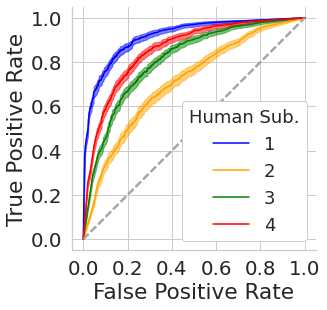

In [34]:

sns.set(font_scale=1.8, style='whitegrid')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sub_cols = ['blue', 'orange',  'green','red']

for i, s in enumerate(sub_df.subj.unique()):

#     fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    s_df = sub_df.loc[sub_df.subj==s]
    
    sns.lineplot(x=s_df.fpr50, y=s_df.tpr50, data=s_df, ax=ax, 
                    color=sub_cols[i], estimator=None, ci=None, label=str(s_df.subj_anon.unique()[0]))
        
    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="darkgray",   alpha=0.8)

    ax.fill_between(
        s_df.fpr50,
        s_df.tpr25.values,
        s_df.tpr975.values,
        color=sub_cols[i],
        alpha=0.5,
    )
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
    ax.set_aspect('equal', 'box')
    legend = ax.legend(title='Human Sub.',frameon=1,framealpha=1,fontsize='small')
    legend.get_title().set_fontsize('small') #
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
#     plt.legend()
    plt.tight_layout()
    sns.despine()
    
plt.savefig('/home/zetetic/Desktop/loki_figs/prediction_acc/human_ROC_CIs.png',dpi=300)
# plt.savefig('/home/zetetic/Desktop/human_ROC_CIs.pdf')